<a href="https://colab.research.google.com/github/rbdlm/Covid/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importações

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import re

## Dataset e Limpeza

In [115]:
df = pd.read_csv('/content/drive/My Drive/Datasets/COVID19_line_list_data.csv')
df.head(2)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df_covid = df.copy()
df_covid.drop(df_covid.columns[[0, 1, 3, 4, 5, 10, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], axis=1, inplace=True)
df_covid.dropna(inplace=True)
df_covid.reset_index(drop=True, inplace=True)

df_covid['reporting date'] = pd.to_datetime(df_covid['reporting date'].apply(lambda x: re.sub(r'/20$','/2020', x)), format='%m/%d/%Y')
df_covid['symptom_onset'] = pd.to_datetime(df_covid['symptom_onset'].apply(lambda x: re.sub(r'/20$','/2020', x)), format='%m/%d/%Y')
df_covid['hosp_visit_date'] = pd.to_datetime(df_covid['hosp_visit_date'].apply(lambda x: re.sub(r'/20$','/2020', x)), format='%m/%d/%Y')
df_covid['exposure_start'] = pd.to_datetime(df_covid['exposure_start'].apply(lambda x: re.sub(r'/20$','/2020', x)), format='%m/%d/%Y')
df_covid['exposure_end'] = pd.to_datetime(df_covid['exposure_end'].apply(lambda x: re.sub(r'/20$','/2020', x)), format='%m/%d/%Y')

df_covid['exposure_duration'] = df_covid['exposure_end'] - df_covid['exposure_start']
df_covid['symptom_hospital'] = df_covid['hosp_visit_date'] - df_covid['symptom_onset']
df_covid['reporting'] = df_covid['reporting date'] - df_covid['hosp_visit_date']
df_covid.drop(df_covid[['exposure_end', 'exposure_start', 'hosp_visit_date', 'symptom_onset', 'reporting date', 'death']], axis=1, inplace=True)
df_covid

,country,gender,age,exposure_duration,symptom_hospital,reporting
0,China,male,66.0,6 days,8 days,9 days
1,China,male,37.0,1 days,6 days,1 days
2,China,male,39.0,1 days,5 days,7 days
3,China,male,56.0,8 days,4 days,1 days
4,China,female,18.0,5 days,1 days,1 days
5,China,female,32.0,4 days,5 days,1 days
6,China,male,45.0,3 days,2 days,1 days
7,China,female,50.0,2 days,8 days,0 days
8,China,male,43.0,6 days,3 days,2 days
9,China,male,42.0,3 days,1 days,2 days


## Tabelas e Gráficos

### Country

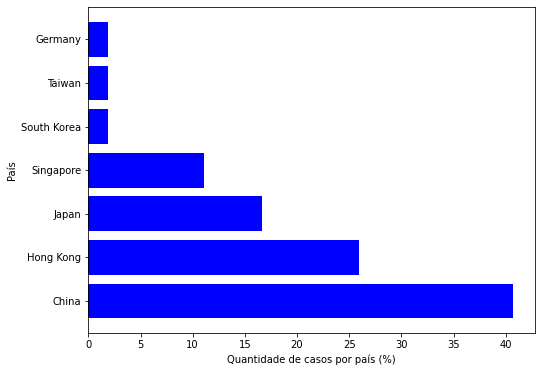




+-------------+---------------+------------+
|      Cidade | Proporção (%) | Quantidade |
+-------------+---------------+------------+
|       China |         40.74 |         22 |
|   Hong Kong |         25.93 |         14 |
|       Japan |         16.67 |          9 |
|   Singapore |         11.11 |          6 |
| South Korea |          1.85 |          1 |
|      Taiwan |          1.85 |          1 |
|     Germany |          1.85 |          1 |
+-------------+---------------+------------+


In [108]:
country = df_covid['country'].value_counts()

y_axis = [round(result/sum(country.values)*100,2) for result in country.values]
x_axis = list(country.index)
width_n = 0.4
bar_color = 'blue'

plt.figure(figsize=(8, 6))
plt.barh(x_axis, y_axis, color=bar_color, align='center')
plt.xlabel('Quantidade de casos por país (%)')
plt.ylabel('País')
plt.show()

print('\n\n')

x = PrettyTable(['Cidade', 'Proporção (%)', 'Quantidade'])
x.align['Cidade'] = 'r'
x.align['Proporção (%)'] = 'r'
x.align['Quantidade'] = 'r'
x.padding_width = 1

for item, value in zip(country.index, country.values):
  x.add_row([item, round(value/sum(country.values)*100,2), value])

print(x)

### Gender

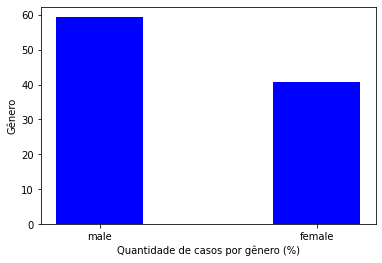




+--------+---------------+------------+
| Gênero | Proporção (%) | Quantidade |
+--------+---------------+------------+
|   male |         59.26 |         32 |
| female |         40.74 |         22 |
+--------+---------------+------------+


In [113]:
gender = df_covid['gender'].value_counts()

y_axis = [round(result/sum(gender.values)*100,2) for result in gender.values]
x_axis = list(gender.index)
width_n = 0.4
bar_color = 'blue'

plt.figure(figsize=(6, 4))
plt.bar(x_axis, y_axis, color=bar_color, width = width_n, align='center')
plt.xlabel('Quantidade de casos por gênero (%)')
plt.ylabel('Gênero')
plt.show()

print('\n\n')

x = PrettyTable(['Gênero', 'Proporção (%)', 'Quantidade'])
x.align['Gênero'] = 'r'
x.align['Proporção (%)'] = 'r'
x.align['Quantidade'] = 'r'
x.padding_width = 1

for item, value in zip(gender.index, gender.values):
  x.add_row([item, round(value/sum(gender.values)*100,2), value])

print(x)

### Age

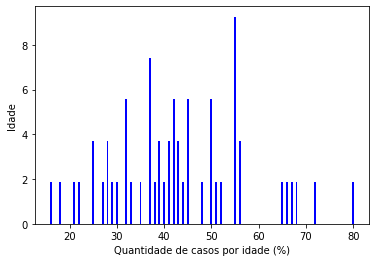




+-------+---------------+------------+
| Isade | Proporção (%) | Quantidade |
+-------+---------------+------------+
|  55.0 |          9.26 |          5 |
|  37.0 |          7.41 |          4 |
|  50.0 |          5.56 |          3 |
|  42.0 |          5.56 |          3 |
|  32.0 |          5.56 |          3 |
|  45.0 |          5.56 |          3 |
|  43.0 |           3.7 |          2 |
|  25.0 |           3.7 |          2 |
|  41.0 |           3.7 |          2 |
|  28.0 |           3.7 |          2 |
|  56.0 |           3.7 |          2 |
|  39.0 |           3.7 |          2 |
|  18.0 |          1.85 |          1 |
|  22.0 |          1.85 |          1 |
|  29.0 |          1.85 |          1 |
|  30.0 |          1.85 |          1 |
|  16.0 |          1.85 |          1 |
|  44.0 |          1.85 |          1 |
|  33.0 |          1.85 |          1 |
|  21.0 |          1.85 |          1 |
|  40.0 |          1.85 |          1 |
|  65.0 |          1.85 |          1 |
|  35.0 |          1.8

In [127]:
age = df_covid['age'].value_counts()

y_axis = [round(result/sum(age.values)*100,2) for result in age.values]
x_axis = list(age.index)
width_n = 0.4
bar_color = 'blue'

plt.figure(figsize=(6, 4))
plt.bar(x_axis, y_axis, color=bar_color, width = width_n, align='center')
plt.xlabel('Quantidade de casos por idade (%)')
plt.ylabel('Idade')
plt.show()

print('\n\n')

x = PrettyTable(['Isade', 'Proporção (%)', 'Quantidade'])
x.align['Idade'] = 'r'
x.align['Proporção (%)'] = 'r'
x.align['Quantidade'] = 'r'
x.padding_width = 1

for item, value in zip(age.index, age.values):
  x.add_row([item, round(value/sum(age.values)*100,2), value])

print(x)

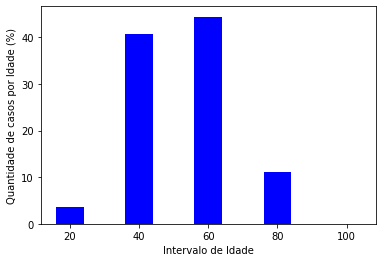




+-------+---------------+------------+
| Idade | Proporção (%) | Quantidade |
+-------+---------------+------------+
|    20 |           3.7 |          2 |
|    40 |         40.74 |         22 |
|    60 |         44.44 |         24 |
|    80 |         11.11 |          6 |
|   100 |           0.0 |          0 |
+-------+---------------+------------+


In [167]:
old_value = 0
intervals = {}
for i in range(20,120,20):
  intervals[str(i)] = df_covid[(df_covid['age'] <= i) & (df_covid['age'] > old_value)]['age'].count()
  old_value = i


y_axis = [round(value/sum(intervals.values())*100,2) for value in intervals.values() ]
x_axis = list(intervals.keys()) 
width_n = 0.4
bar_color = 'blue'

plt.figure(figsize=(6, 4))
plt.bar(x_axis, y_axis, color=bar_color, width = width_n, align='center')
plt.xlabel('Intervalo de Idade')
plt.ylabel('Quantidade de casos por Idade (%)')
plt.show()

print('\n\n')

x = PrettyTable(['Idade', 'Proporção (%)', 'Quantidade'])
x.align['Idade'] = 'r'
x.align['Proporção (%)'] = 'r'
x.align['Quantidade'] = 'r'
x.padding_width = 1

for item, value in intervals.items():
  x.add_row([item, round(value/sum(intervals.values())*100,2), value])

print(x)